## 밀집옵티컬플로우 계산

In [1]:
import sys
import numpy as np
import cv2

In [6]:
cap = cv2.VideoCapture("/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/vtest.avi")

if not cap.isOpened():
    print('video load failed')
    sys.exit()
    
ret, frame1 = cap.read()

if not ret:
    print('video read failed')
    sys.exit()
    
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while True:
    ret, frame2 = cap.read()
    
    if not ret:
        print('frame read failed')
        sys.exit()
        
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # 이전영상, 현재 영상, flow=None, pyrscale=0.5 levels=3, winsize=13, iterations(알고리즘 반복 횟수)=3, poly_n(다항식 확장을 위한 이웃 픽셀 크기)=5, poly_sigma(가우시안 표준편차)=1.1
    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 13, 3, 5, 1.1, 0) 
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[..., 1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    cv2.imshow('frame', frame2)
    cv2.imshow('flow', bgr)
    if cv2.waitKey(20) == 27:
        break
        
    gray1 = gray2
    
cv2.destroyAllWindows()


frame read failed


SystemExit: 

/Users/jungjihoon/miniforge3/envs/dl/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


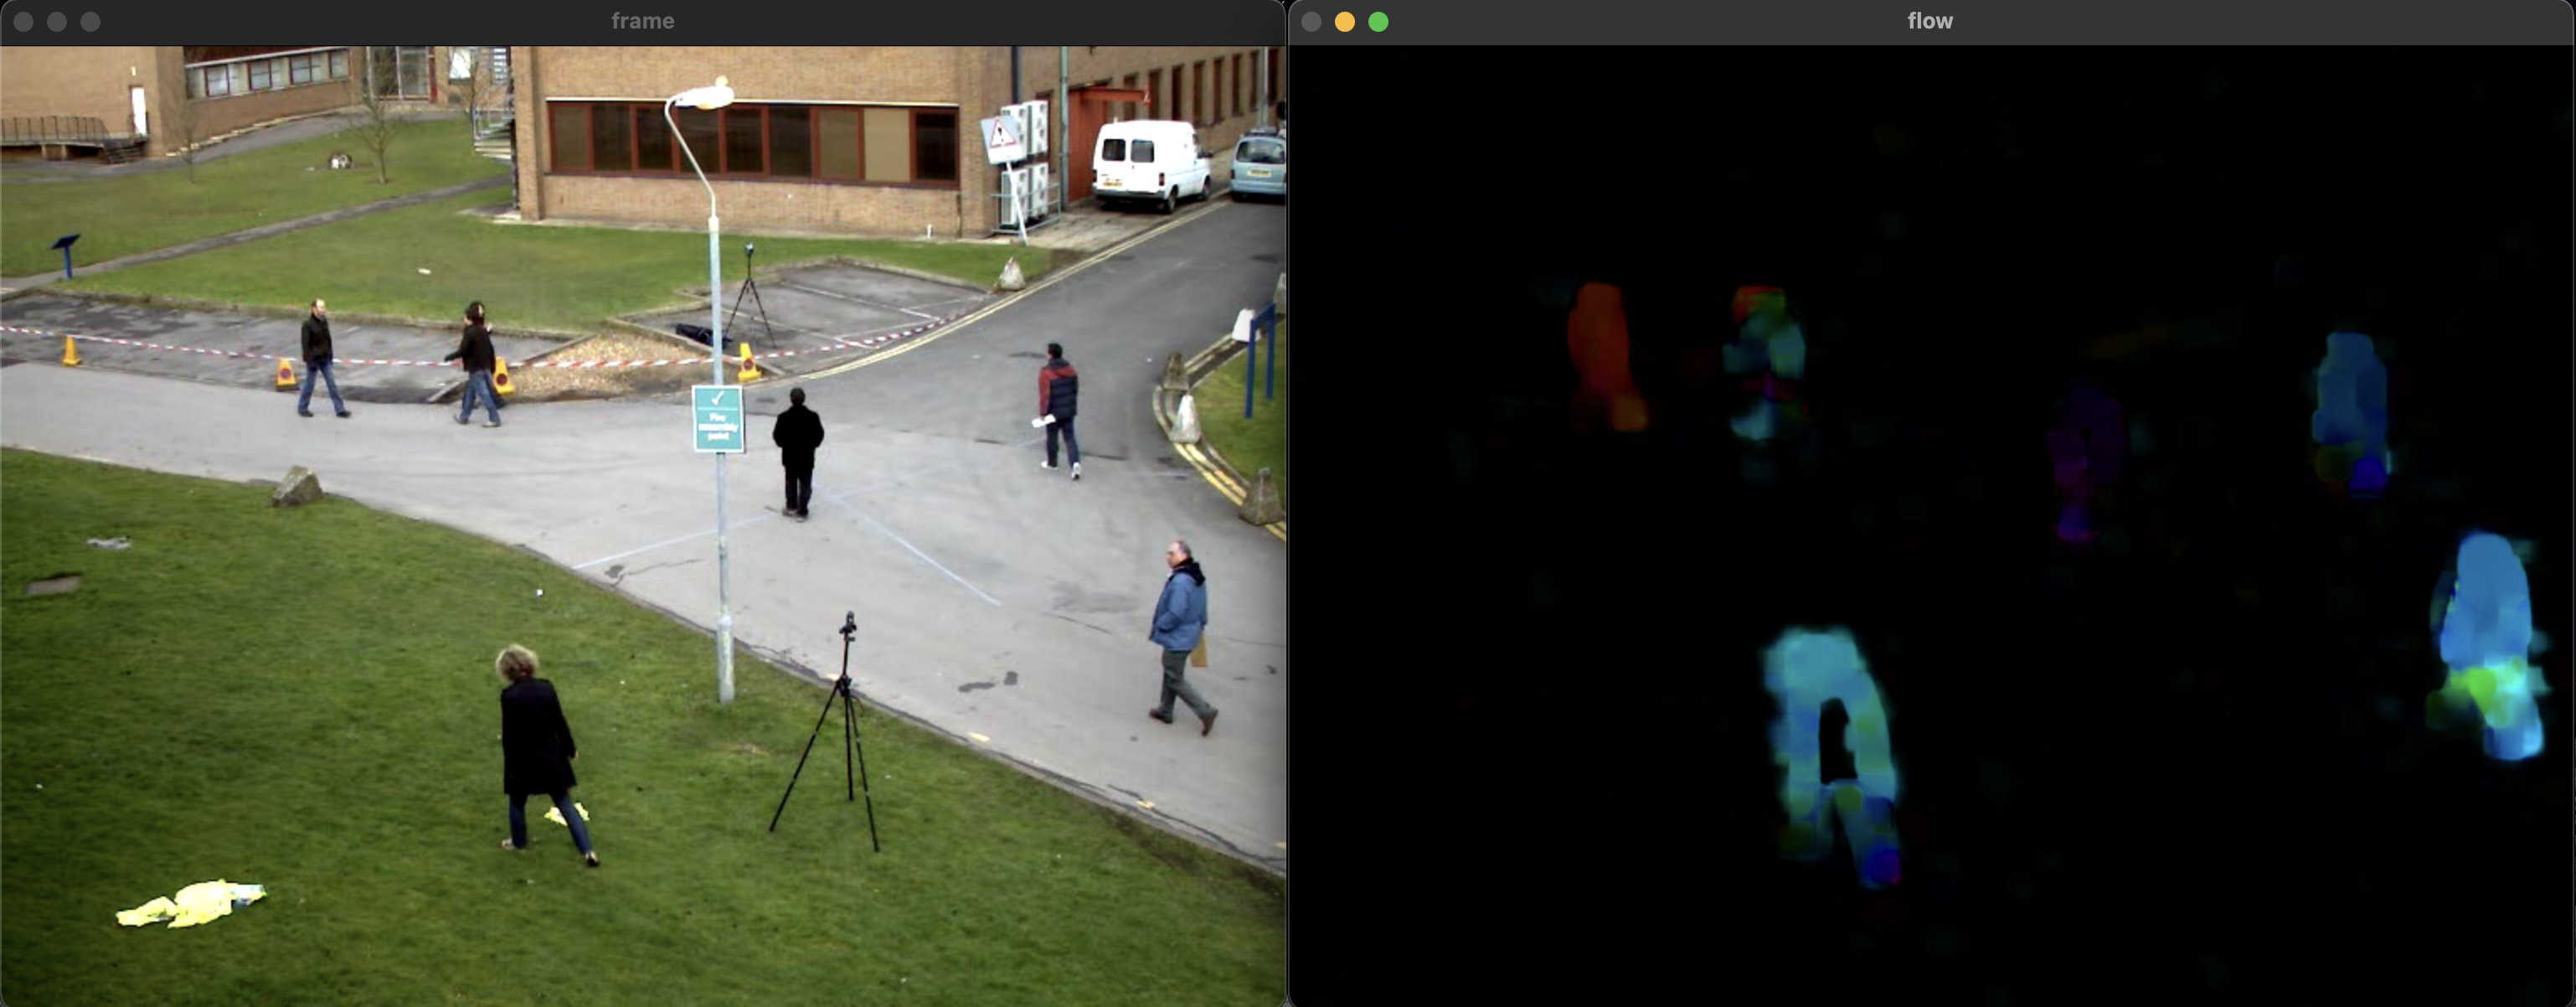